In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

데이터셋 로드 및 2D 변환

In [6]:
# MNIST 데이터셋 로드
# tensorflow는 MNIST 데이터셋을 바로 불러올 수 있는 기능 제공
mnist = tf.keras.datasets.mnist

데이터셋 훈련

In [7]:
# 데이터셋 로드 및 분할
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 데이터 전처리: 이미지를 0~1 범위로 정규화
X_train, X_test = X_train / 255.0, X_test / 255.0

모델 학습 및 출력

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8553 - loss: 0.4903
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9568 - loss: 0.1505
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9676 - loss: 0.1109
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9733 - loss: 0.0865
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9787 - loss: 0.0712
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0835
Test accuracy: 0.9765999913215637


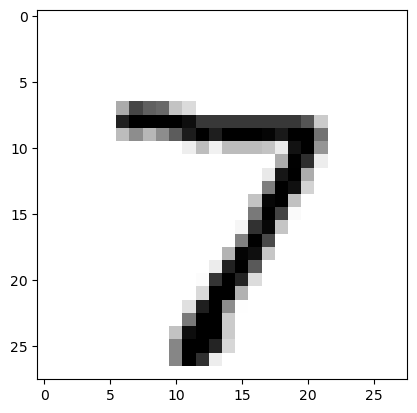

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted label for the first test image: 7


In [16]:
# 모델 구성
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    # 28x28 이미지를 1차원 벡터로 변환
    layers.Dense(128, activation='relu'),    # 첫 번째 은닉층: 128개의 뉴런, ReLU 활성화 함수
    layers.Dropout(0.2),                     # Dropout: 과적합 방지 (20%)
    layers.Dense(10, activation='softmax')   # 출력층: 10개의 클래스 (0~9)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # 다중 클래스 분류 손실 함수
              metrics=['accuracy'])

# 모델 학습
model.fit(X_train, y_train, epochs = 5)

# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

# 첫 번째 테스트 이미지를 출력하고 예측값 확인
plt.imshow(X_test[0], cmap=plt.cm.binary)
plt.show()

# 예측 수행
y_pred = model.predict(X_test)

# 예측된 라벨을 DataFrame으로 변환
y_pred_labels = pd.DataFrame(np.argmax(y_pred, axis=1), columns=['Predicted'])

# 원핫 인코딩으로 변환
y_pred_one_hot_df = pd.get_dummies(y_pred_labels['Predicted'], prefix='Class')

# 예측 수행
y_pred = model.predict(X_test)
print(f"Predicted label for the first test image: {tf.argmax(y_pred[0])}")

In [17]:
# 예측된 라벨을 원핫 인코딩으로 변환
y_pred_one_hot = tf.keras.utils.to_categorical(np.argmax(y_pred, axis=1), num_classes=10)
print(f"One-hot encoded: {y_pred_one_hot[0]}")

One-hot encoded: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [18]:
# 원핫 인코딩으로 변환
y_pred_one_hot_df = pd.get_dummies(y_pred_labels['Predicted'], columns=['Predicted'], prefix='Class')
print(f"Predicted label for the first test image (One-hot encoded):\n{y_pred_one_hot_df.iloc[0]}")

Predicted label for the first test image (One-hot encoded):
Class_0    False
Class_1    False
Class_2    False
Class_3    False
Class_4    False
Class_5    False
Class_6    False
Class_7     True
Class_8    False
Class_9    False
Name: 0, dtype: bool
